In [1]:
#our model will try to predict the number of delays caused in minutes at a given month, for a given day, hence the airport security can prepare in advance to create a scgedule for the upcoming flights accordingly.
#the time of the month can be related to a specific weather, given the specific airport. 

#The data file will be uploaded along side the code

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
path=('airlines.csv')
data = pd.read_csv(path)
data.head(10)

,AirportCode,AirportName,TimeLabel,TimeMonth,TimeMonthName,TimeYear,Statistics_ofDelays_Carrier,Statistics_of Delays_Late Aircraft,Statistics_ofDelaysNationalAviationSystem,Statistics_ofDelays_Security,...,StatisticsFlightsDelayed,StatisticsFlightsDiverted,StatisticsFlightsOnTime,StatisticsFlightsTotal,StatisticsMinutesDelayedCarrier,StatisticsMinutesDelayedLateAircraft,StatisticsMinutesDelayedNationalAviationSystem,StatisticsMinutesDelayedSecurity,StatisticsMinutesDelayedTotal,StatisticsMinutesDelayedWeather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141
5,DEN,"Denver, CO: Denver International",2003/06,6,June,2003,516,323,664,11,...,1611,22,10024,11691,26634,18969,23538,706,75428,5581
6,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",2003/06,6,June,2003,986,1390,2147,19,...,4798,133,22303,27628,70918,80714,90574,683,263521,20632
7,DTW,"Detroit, MI: Detroit Metro Wayne County",2003/06,6,June,2003,376,371,570,6,...,1395,9,10227,11754,21802,18715,16482,139,60667,3529
8,EWR,"Newark, NJ: Newark Liberty International",2003/06,6,June,2003,322,519,1948,10,...,2921,42,9441,12506,20190,30905,91048,490,150513,7880
9,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",2003/06,6,June,2003,247,256,427,5,...,967,10,3672,4662,12547,14600,14935,141,44303,2080


In [4]:
df = pd.DataFrame(data)
rndm=df.sample(frac=1) #randomising our data
rndm1=rndm.drop(['TimeLabel', 'AirportName', 'TimeMonthName' , 'StatisticsCarriersNames', 'StatisticsMinutesDelayedTotal'], axis = 1)

In [5]:
#the data was ordered by year, 2006, 2007, 2008 etc. We randomised it so that test train splits can have a mixed data

In [6]:
rndm1.head()

,AirportCode,TimeMonth,TimeYear,Statistics_ofDelays_Carrier,Statistics_of Delays_Late Aircraft,Statistics_ofDelaysNationalAviationSystem,Statistics_ofDelays_Security,Statistics_of Delays_Weather,StatisticsCarriersTotal,StatisticsFlightsCancelled,StatisticsFlightsDelayed,StatisticsFlightsDiverted,StatisticsFlightsOnTime,StatisticsFlightsTotal,StatisticsMinutesDelayedCarrier,StatisticsMinutesDelayedLateAircraft,StatisticsMinutesDelayedNationalAviationSystem,StatisticsMinutesDelayedSecurity,StatisticsMinutesDelayedWeather
3773,CLT,4,2014,378,484,544,1,22,10,80,1431,9,7961,9481,20737,26720,18307,32,1370
1562,SEA,11,2007,531,592,905,8,26,14,68,2064,9,6524,8665,29013,35888,28646,305,1567
3174,LAS,7,2012,624,1051,426,8,75,13,49,2182,34,10176,12441,32560,60647,15890,141,5075
83,SEA,8,2003,482,730,364,24,57,12,113,1661,12,8229,10015,27105,41966,13662,839,4340
441,DFW,9,2004,673,588,640,8,89,14,581,2001,83,25359,28024,45954,32507,24201,267,6567


In [7]:
print(data.shape[0])
print(data.columns.tolist())
print(data.dtypes)


4408
['AirportCode', 'AirportName', 'TimeLabel', 'TimeMonth', 'TimeMonthName', 'TimeYear', 'Statistics_ofDelays_Carrier', 'Statistics_of Delays_Late Aircraft', 'Statistics_ofDelaysNationalAviationSystem', 'Statistics_ofDelays_Security', 'Statistics_of Delays_Weather', 'StatisticsCarriersNames', 'StatisticsCarriersTotal', 'StatisticsFlightsCancelled', 'StatisticsFlightsDelayed', 'StatisticsFlightsDiverted', 'StatisticsFlightsOnTime', 'StatisticsFlightsTotal', 'StatisticsMinutesDelayedCarrier', 'StatisticsMinutesDelayedLateAircraft', 'StatisticsMinutesDelayedNationalAviationSystem', 'StatisticsMinutesDelayedSecurity', 'StatisticsMinutesDelayedTotal', 'StatisticsMinutesDelayedWeather']
AirportCode                                       object
AirportName                                       object
TimeLabel                                         object
TimeMonth                                          int64
TimeMonthName                                     object
TimeYear               

In [8]:
#trying to convert object data to numbers

In [9]:
#data.Airport.Code.value_counts()

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

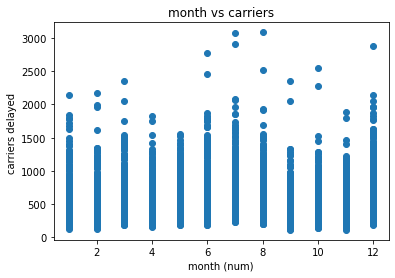

In [11]:
ax = plt.axes()

ax.scatter(data.TimeMonth, data.Statistics_ofDelays_Carrier)

# Label the axes
ax.set(xlabel='month (num)',
       ylabel='carriers delayed ',
       title='month vs carriers');

In [12]:
#OUTLIERS DETECTED, but we will not remove outliers because the number of flights depend from airport to airport
#Some iarports are more busy and hence have more delays in flights, we cannot desregard that


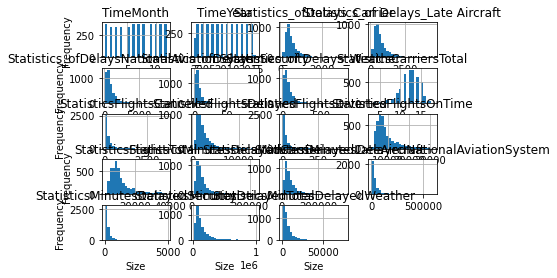

In [13]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')
### END SOLUTION

In [14]:
#we have right skewed data


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   AirportCode                                     4408 non-null   object
 1   AirportName                                     4408 non-null   object
 2   TimeLabel                                       4408 non-null   object
 3   TimeMonth                                       4408 non-null   int64 
 4   TimeMonthName                                   4408 non-null   object
 5   TimeYear                                        4408 non-null   int64 
 6   Statistics_ofDelays_Carrier                     4408 non-null   int64 
 7   Statistics_of Delays_Late Aircraft              4408 non-null   int64 
 8   Statistics_ofDelaysNationalAviationSystem       4408 non-null   int64 
 9   Statistics_ofDelays_Security                    4408

In [16]:
data['code'] = pd.factorize(data.AirportCode)[0]

In [17]:
#this is a way of converting airport names to discrete numerical values

In [18]:
data.head()
#OBJECTS REMOVED ALREADY DUE TO A MISTAKE, BUT WILL NOT AFFECT THE OUTCOME

,AirportCode,AirportName,TimeLabel,TimeMonth,TimeMonthName,TimeYear,Statistics_ofDelays_Carrier,Statistics_of Delays_Late Aircraft,Statistics_ofDelaysNationalAviationSystem,Statistics_ofDelays_Security,...,StatisticsFlightsDiverted,StatisticsFlightsOnTime,StatisticsFlightsTotal,StatisticsMinutesDelayedCarrier,StatisticsMinutesDelayedLateAircraft,StatisticsMinutesDelayedNationalAviationSystem,StatisticsMinutesDelayedSecurity,StatisticsMinutesDelayedTotal,StatisticsMinutesDelayedWeather,code
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,27,23974,30060,61606,68335,118831,518,268764,19474,0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,3,7875,9639,20319,28189,24400,99,77167,4160,1
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,15,6998,8287,13635,26810,17556,278,64480,6201,2
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,14,7021,8670,14763,23379,23804,127,65865,3792,3
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,18,5321,6513,13775,13712,20999,120,52747,4141,4


In [19]:
data1=data.drop(['AirportCode', 'TimeLabel', 'AirportName', 'TimeMonthName' , 'StatisticsCarriersNames', 'StatisticsMinutesDelayedTotal', 'StatisticsMinutesDelayedNationalAviationSystem' ], axis = 1)

In [20]:
#we can drop airport names and code because we converted and stored it in numerical values

In [21]:
data1.head(30)

,TimeMonth,TimeYear,Statistics_ofDelays_Carrier,Statistics_of Delays_Late Aircraft,Statistics_ofDelaysNationalAviationSystem,Statistics_ofDelays_Security,Statistics_of Delays_Weather,StatisticsCarriersTotal,StatisticsFlightsCancelled,StatisticsFlightsDelayed,StatisticsFlightsDiverted,StatisticsFlightsOnTime,StatisticsFlightsTotal,StatisticsMinutesDelayedCarrier,StatisticsMinutesDelayedLateAircraft,StatisticsMinutesDelayedSecurity,StatisticsMinutesDelayedWeather,code
0,6,2003,1009,1275,3217,17,328,11,216,5843,27,23974,30060,61606,68335,518,19474,0
1,6,2003,374,495,685,3,66,14,138,1623,3,7875,9639,20319,28189,99,4160,1
2,6,2003,296,477,389,8,78,11,29,1245,15,6998,8287,13635,26810,278,6201,2
3,6,2003,300,472,735,2,54,11,73,1562,14,7021,8670,14763,23379,127,3792,3
4,6,2003,283,268,487,4,58,13,74,1100,18,5321,6513,13775,13712,120,4141,4
5,6,2003,516,323,664,11,98,13,34,1611,22,10024,11691,26634,18969,706,5581,5
6,6,2003,986,1390,2147,19,258,13,394,4798,133,22303,27628,70918,80714,683,20632,6
7,6,2003,376,371,570,6,71,11,123,1395,9,10227,11754,21802,18715,139,3529,7
8,6,2003,322,519,1948,10,121,13,102,2921,42,9441,12506,20190,30905,490,7880,8
9,6,2003,247,256,427,5,34,11,13,967,10,3672,4662,12547,14600,141,2080,9


In [22]:
#we're dropping minute total delayed because we dont want overfitting, as it is a logical arithematic calculation
#we could also try dummy variables for categorical variables

In [23]:
# Get a Pd.Series consisting of all the string categoricals
import numpy as np
from sklearn.preprocessing import OneHotEncoder

#one_hot_encode_cols = data.dtypes[df.dtypes == np.object]  # filtering by string categoricals
#one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

#df[one_hot_encode_cols].head().T

In [24]:
#the above code of one hot encoding could have been used too, for the airport names.


In [25]:
data2 = data1
data1.isnull() #checking for null data

,TimeMonth,TimeYear,Statistics_ofDelays_Carrier,Statistics_of Delays_Late Aircraft,Statistics_ofDelaysNationalAviationSystem,Statistics_ofDelays_Security,Statistics_of Delays_Weather,StatisticsCarriersTotal,StatisticsFlightsCancelled,StatisticsFlightsDelayed,StatisticsFlightsDiverted,StatisticsFlightsOnTime,StatisticsFlightsTotal,StatisticsMinutesDelayedCarrier,StatisticsMinutesDelayedLateAircraft,StatisticsMinutesDelayedSecurity,StatisticsMinutesDelayedWeather,code
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4404,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4405,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
#no NAs found

In [27]:
data2 = data2.fillna(0)

In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   TimeMonth                                  4408 non-null   int64
 1   TimeYear                                   4408 non-null   int64
 2   Statistics_ofDelays_Carrier                4408 non-null   int64
 3   Statistics_of Delays_Late Aircraft         4408 non-null   int64
 4   Statistics_ofDelaysNationalAviationSystem  4408 non-null   int64
 5   Statistics_ofDelays_Security               4408 non-null   int64
 6   Statistics_of Delays_Weather               4408 non-null   int64
 7   StatisticsCarriersTotal                    4408 non-null   int64
 8   StatisticsFlightsCancelled                 4408 non-null   int64
 9   StatisticsFlightsDelayed                   4408 non-null   int64
 10  StatisticsFlightsDiverted                  4408 

In [29]:
from sklearn.preprocessing import StandardScaler

# will try scaling again after train test splitz

In [30]:
scaler = StandardScaler()
data3 =scaler.fit(data2)
data4 =scaler.transform(data2)


In [31]:
print (data4)

[[-0.16744691 -1.7025688   1.31794624 ...  1.19088269  2.03761995
  -1.67332005]
 [-0.16744691 -1.7025688  -0.6087537  ... -0.43854427 -0.32686222
  -1.55379719]
 [-0.16744691 -1.7025688  -0.8454192  ...  0.25755937 -0.01173174
  -1.43427433]
 ...
 [-1.61357927  1.84250597 -0.0443975  ... -0.56687623  0.40962596
   1.43427433]
 [-1.61357927  1.84250597 -0.71798393 ... -0.60187585 -0.48805585
   1.55379719]
 [-1.61357927  1.84250597 -0.49952347 ... -0.6796528  -0.56880707
   1.67332005]]


In [32]:
data4 = pd.DataFrame(data4, columns = data2.columns)

In [33]:
data4.head()

,TimeMonth,TimeYear,Statistics_ofDelays_Carrier,Statistics_of Delays_Late Aircraft,Statistics_ofDelaysNationalAviationSystem,Statistics_ofDelays_Security,Statistics_of Delays_Weather,StatisticsCarriersTotal,StatisticsFlightsCancelled,StatisticsFlightsDelayed,StatisticsFlightsDiverted,StatisticsFlightsOnTime,StatisticsFlightsTotal,StatisticsMinutesDelayedCarrier,StatisticsMinutesDelayedLateAircraft,StatisticsMinutesDelayedSecurity,StatisticsMinutesDelayedWeather,code
0,-0.167447,-1.702569,1.317946,0.865037,2.454341,1.902058,3.322768,-0.547433,0.008454,2.011394,-0.024232,2.758227,2.647190,1.092895,0.488435,1.190883,2.037620,-1.673320
1,-0.167447,-1.702569,-0.608754,-0.523519,-0.292449,-0.428803,-0.162516,0.762839,-0.261591,-0.455355,-0.684439,-0.258483,-0.329236,-0.604415,-0.547708,-0.438544,-0.326862,-1.553797
2,-0.167447,-1.702569,-0.845419,-0.555563,-0.613559,0.403648,-0.002885,-0.547433,-0.638961,-0.676310,-0.354335,-0.422819,-0.526294,-0.879194,-0.583299,0.257559,-0.011732,-1.434274
3,-0.167447,-1.702569,-0.833283,-0.564464,-0.238207,-0.595293,-0.322148,-0.547433,-0.486628,-0.491012,-0.381844,-0.418509,-0.470471,-0.832822,-0.671851,-0.329657,-0.383681,-1.314751
4,-0.167447,-1.702569,-0.884863,-0.927625,-0.507245,-0.262312,-0.268937,0.326082,-0.483166,-0.761068,-0.271810,-0.737064,-0.784861,-0.873439,-0.921350,-0.356878,-0.329796,-1.195229


In [34]:
#we have scaled our data
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   TimeMonth                                  4408 non-null   float64
 1   TimeYear                                   4408 non-null   float64
 2   Statistics_ofDelays_Carrier                4408 non-null   float64
 3   Statistics_of Delays_Late Aircraft         4408 non-null   float64
 4   Statistics_ofDelaysNationalAviationSystem  4408 non-null   float64
 5   Statistics_ofDelays_Security               4408 non-null   float64
 6   Statistics_of Delays_Weather               4408 non-null   float64
 7   StatisticsCarriersTotal                    4408 non-null   float64
 8   StatisticsFlightsCancelled                 4408 non-null   float64
 9   StatisticsFlightsDelayed                   4408 non-null   float64
 10  StatisticsFlightsDiverte

In [35]:
#we retained our column names

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
#doing a simple split with 30 percent test portion

In [38]:
y_col = 'StatisticsMinutesDelayedWeather'
feature_cols = [x for x in data4.columns if x != y_col]
x_data = data4[feature_cols]
y_data = data4[y_col]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=50)


In [39]:
x_train

,TimeMonth,TimeYear,Statistics_ofDelays_Carrier,Statistics_of Delays_Late Aircraft,Statistics_ofDelaysNationalAviationSystem,Statistics_ofDelays_Security,Statistics_of Delays_Weather,StatisticsCarriersTotal,StatisticsFlightsCancelled,StatisticsFlightsDelayed,StatisticsFlightsDiverted,StatisticsFlightsOnTime,StatisticsFlightsTotal,StatisticsMinutesDelayedCarrier,StatisticsMinutesDelayedLateAircraft,StatisticsMinutesDelayedSecurity,code
3528,0.121780,1.024412,0.495685,0.327416,-0.523518,-0.761783,-0.215727,-0.110676,-0.074637,-0.091188,-0.161775,0.381812,0.270247,1.020706,0.285212,-0.718541,0.597614
4300,0.989459,1.569808,-0.787770,-0.628551,-0.130809,-0.761783,-0.561595,-1.420947,-0.420848,-0.454771,-0.079249,-0.250987,-0.326758,-0.640304,-0.497638,-0.551321,-0.717137
618,-1.035126,-1.157173,-0.050466,-0.078469,0.631826,-0.428803,0.103536,-0.110676,-0.559333,0.309220,-0.381844,-1.025449,-0.746090,-0.236768,0.092855,-0.022438,-0.597614
2642,-1.613579,0.479016,-0.435806,-0.425608,-0.245801,-0.262312,-0.242332,-0.547433,1.826065,-0.368259,-0.161775,-0.152985,-0.134801,-0.379379,-0.408879,-0.376323,-1.314751
576,-1.613579,-1.157173,0.086072,-0.030404,-0.435646,0.903118,-0.268937,0.326082,-0.098871,-0.236738,-0.381844,-0.588655,-0.523088,-0.043099,-0.106806,0.366447,1.314751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,1.567912,0.751714,-0.180935,-0.236907,-0.597286,-0.095822,-0.801042,0.326082,-0.479704,-0.471138,-0.409353,-0.864673,-0.812408,-0.459708,-0.354034,-0.352990,1.195229
70,0.411006,-1.702569,-0.520763,-0.728242,-0.106943,1.569078,-0.189122,-0.547433,-0.029629,-0.400409,1.048603,-0.939814,-0.826546,-0.278083,-0.518053,0.735888,-0.239046
132,0.989459,-1.702569,-0.933410,-0.961448,-0.712278,-0.761783,-0.987278,0.326082,-0.680507,-0.927077,-0.601913,-0.425255,-0.593778,-0.955248,-0.961974,-0.784652,0.239046
2014,-1.035126,-0.066380,-0.105081,0.202802,0.056866,-0.095822,0.037023,0.762839,-0.407000,0.078912,-0.189284,0.298987,0.234100,-0.260776,0.055096,-0.205213,-0.119523


In [40]:
from scipy import stats
from scipy.stats import norm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/srv/conda/envs/notebook/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [41]:
def plot_data(data4, feature_cols) :
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data4[feature_cols].hist()
    plt.subplot(1,2,2)
    stats.probplot(data4[feature_cols], dist='norm', plot = pylab)
    plt.show()

In [42]:
#plot_data(data4, 'StatisticsMinutesDelayedWeather')

(array([1.976e+03, 1.306e+03, 5.260e+02, 2.780e+02, 1.290e+02, 8.100e+01,
        3.000e+01, 3.000e+01, 1.500e+01, 1.900e+01, 3.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([-0.96206397, -0.36975455,  0.22255488,  0.8148643 ,  1.40717372,
         1.99948314,  2.59179256,  3.18410198,  3.7764114 ,  4.36872082,
         4.96103025,  5.55333967,  6.14564909,  6.73795851,  7.33026793,
         7.92257735,  8.51488677,  9.10719619,  9.69950562, 10.29181504,
        10.88412446]),
 <BarContainer object of 20 artists>)

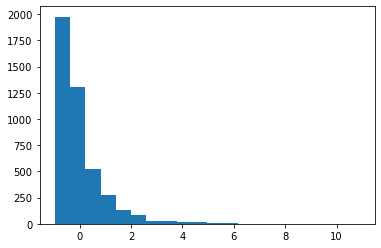

In [43]:
plt.hist(data4['StatisticsMinutesDelayedWeather'],bins=20)

In [44]:
cor = x_train.corr()

In [45]:
print(cor)

                                           TimeMonth  TimeYear  \
TimeMonth                                   1.000000 -0.087227   
TimeYear                                   -0.087227  1.000000   
Statistics_ofDelays_Carrier                -0.008623 -0.072739   
Statistics_of Delays_Late Aircraft         -0.016517 -0.002495   
Statistics_ofDelaysNationalAviationSystem  -0.015081 -0.187407   
Statistics_ofDelays_Security                0.049952 -0.310832   
Statistics_of Delays_Weather               -0.075592 -0.188556   
StatisticsCarriersTotal                     0.026189 -0.480540   
StatisticsFlightsCancelled                 -0.129674 -0.041894   
StatisticsFlightsDelayed                   -0.018317 -0.125209   
StatisticsFlightsDiverted                  -0.007387 -0.009339   
StatisticsFlightsOnTime                     0.025567 -0.062217   
StatisticsFlightsTotal                      0.009909 -0.081539   
StatisticsMinutesDelayedCarrier            -0.018732  0.025531   
Statistics

In [46]:
#can create a heatmap using sns

In [47]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [48]:
corr_features = correlation(x_train, 0.9)
len(set(corr_features))

4

In [49]:
corr_features

{'StatisticsFlightsDelayed',
 'StatisticsFlightsTotal',
 'StatisticsMinutesDelayedCarrier',
 'StatisticsMinutesDelayedLateAircraft'}

In [50]:
#these features can be removed and their adjacent features can be kept

In [51]:
#can drop the same features using xtest.drop


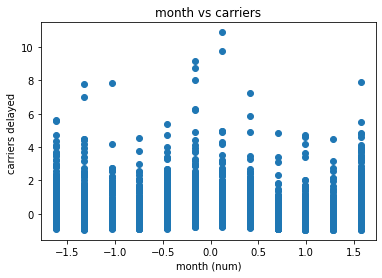

In [52]:
ax = plt.axes()

ax.scatter(data4.TimeMonth, data4.StatisticsMinutesDelayedWeather)

# Label the axes
ax.set(xlabel='month (num)',
       ylabel='carriers delayed ',
       title='month vs carriers');

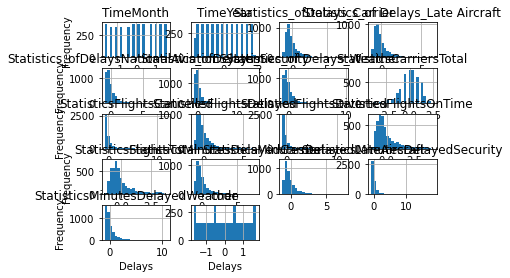

In [53]:
axList = data4.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Delays')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [55]:
LR = LinearRegression()
# Storage for error values
error_df = list()
LR = LR.fit(x_train, y_train)
y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)
error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

In [56]:
error_df

[train    0.048917
 test     0.053975
 Name: no enc, dtype: float64]

In [57]:
# The coefficients
print('Coefficients: \n', LR.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_test_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_test_pred))

# Plot outputs
#plt.scatter(x_test, y_test,  color='black')
#plt.plot(X_test, y_test_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

Coefficients: 
 [ 0.00751993  0.00701041 -0.98742523 -1.54787646 -2.36604958  0.02720157
  0.7171709   0.01465783  0.04080319  4.04325082  0.05666607 -0.51132771
  0.61246877  0.19615295  0.25608724 -0.03332347  0.00478553]
Mean squared error: 0.05
Coefficient of determination: 0.95


In [58]:
#the commented code can be used to plot xtest vs ytest, and y test vs y pred

In [59]:
#try to drop 1 corelation feature and try again. Did not change, MSE is still 5 percent

In [60]:
x_train.shape

(3085, 17)

In [61]:
y_train.shape

(3085,)

In [62]:
from sklearn.preprocessing import PolynomialFeatures 

In [63]:
#error_dpf = list()
#pf = PolynomialFeatures(degree = 2)
# Create the features and fit the model
#x_poly = pf.fit_transform(x_train)
#LR = LR.fit(x_poly, y_train)
#y_train_pred = LR.predict(x_poly)
#y_train_pred = LR.predict(x_test)



In [64]:
#polynomial features could not bring the r2 score to increase

In [65]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [66]:
scorep = []
rr = Ridge(alpha=0.001)
rr = rr.fit(x_train, y_train)
y_pred_rr = rr.predict(x_test)
score = r2_score(y_test.values, y_pred_rr)
scorep.append(score)

In [68]:
print(scorep)
#tried different values of alpha, 100 was bad. stick to 0.001

[0.9527225741396024]


In [69]:
#The lasso regression model
scored = []
lassor = Lasso(alpha=0.007)
lassor = lassor.fit(x_train, y_train)
y_pred_lr = lassor.predict(x_test)
score = r2_score(y_test.values, y_pred_lr)
scored.append(score)

In [70]:
print(scored)

[0.9483355420884019]


In [71]:
x_data.shape

(4408, 17)

In [72]:
y_data.shape

(4408,)

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

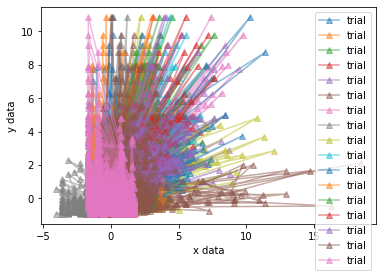

In [73]:
plt.plot(x_data, y_data, label='trial', marker='^', alpha=.5)
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')

In [74]:
x_test

,TimeMonth,TimeYear,Statistics_ofDelays_Carrier,Statistics_of Delays_Late Aircraft,Statistics_ofDelaysNationalAviationSystem,Statistics_ofDelays_Security,Statistics_of Delays_Weather,StatisticsCarriersTotal,StatisticsFlightsCancelled,StatisticsFlightsDelayed,StatisticsFlightsDiverted,StatisticsFlightsOnTime,StatisticsFlightsTotal,StatisticsMinutesDelayedCarrier,StatisticsMinutesDelayedLateAircraft,StatisticsMinutesDelayedSecurity,code
216,-1.613579,-1.429871,0.228678,0.211703,0.011304,1.402588,-0.002885,1.199596,-0.126568,0.123922,-0.601913,0.134464,0.126971,-0.134815,-0.156825,1.350325,-0.119523
2694,-1.324353,0.479016,-0.538968,-0.073129,0.507071,-0.761783,-0.109306,0.326082,0.361590,0.138535,0.415905,-0.337372,-0.210447,-0.388628,0.052825,-0.648542,1.434274
3290,1.278685,0.751714,-0.399396,-0.372202,-0.742653,-0.428803,-0.774437,0.326082,-0.573181,-0.634808,-0.629421,0.124907,-0.088598,-0.608033,-0.412828,-0.356878,-0.119523
3407,-1.035126,1.024412,0.786966,1.003892,-0.131894,0.403648,0.236562,0.326082,-0.029629,0.422036,0.003276,1.112613,0.969425,0.528783,0.834461,0.910886,0.000000
3010,-1.613579,0.751714,-0.159696,0.033683,1.294658,-0.262312,-0.375358,0.762839,-0.237356,0.657605,-0.436861,0.455641,0.506075,-0.269779,-0.149056,-0.535765,1.075706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,-1.613579,1.297110,-0.287131,-0.231567,-0.395508,0.403648,0.742061,-2.731219,2.577344,-0.310974,4.817280,-1.069672,-0.775532,-0.292225,-0.040579,0.222560,0.358569
2557,0.989459,0.206318,0.128550,0.581985,-0.318485,-0.262312,-0.268937,0.762839,-0.206197,0.030980,-0.464370,1.601687,1.242421,-0.097405,0.240252,-0.181880,-1.075706
418,0.411006,-1.429871,-0.132389,-0.128315,0.019982,2.068548,0.728759,-0.110676,-0.237356,-0.018121,0.443414,-0.589967,-0.471054,-0.149779,0.051792,1.762543,-0.239046
3257,0.989459,0.751714,-0.836317,-0.920504,-0.715533,-0.262312,-0.867555,-0.547433,-0.095409,-0.889082,-0.546896,-0.984412,-0.994308,-0.869081,-0.918924,-0.500766,-0.597614


In [76]:
#Ridge regression gives the best score of 0.952